# Compare $E_{ave} = (E_1 + E_2)/2$
Create for paper Figure 8.

`Esum_df.csv` calculated by script `plot_E_slices.py` for each dataset.

In [1]:
%matplotlib notebook

In [2]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd

In [3]:
os.chdir('..')
os.getcwd()

'C:\\Users\\pfsch\\Box Sync\\Projects\\fnpc\\analysis'

In [4]:
sys.path.append('../scripts/')
import bicorr_plot as bicorr_plot
import bicorr_math as bicorr_math

In [5]:
os.listdir('cgmf/datap/')

['Asym_df.csv',
 'bhm_e.npz',
 'by_angle_e_df.csv',
 'det_df_e_filled.csv',
 'Esum_df.csv',
 'num_fissions.mat',
 'singles_e_df_filled.csv',
 'singles_hist.npz',
 'singles_hist_e_n.npz',
 'slices_analysis.npz',
 'sparse_bhm.npz']

In [6]:
Esum_df_meas = pd.read_csv(r'Cf072115_to_Cf072215b/datap/Esum_df.csv',index_col=0)
Esum_df_cgmf = pd.read_csv(r'cgmf/datap/Esum_df.csv',index_col=0)
Esum_df_freya= pd.read_csv(r'freya/datap/Esum_df.csv',index_col=0)
Esum_df_ipol = pd.read_csv(r'ipol/datap/Esum_df.csv',index_col=0)
Esum_df_ipol_noct = pd.read_csv(r'ipol_noct/datap/Esum_df.csv',index_col=0)

In [7]:
Esum_df_ipol

,th_bin_center,Eave,Eave_err
0,15.01,2.375611,0.006257
1,25.01,2.328685,0.005605
2,35.01,2.324909,0.006935
3,45.01,2.313905,0.005955
4,55.01,2.299033,0.006026
5,65.01,2.285956,0.007033
6,75.01,2.272009,0.006605
7,85.01,2.263462,0.006607
8,95.01,2.259686,0.008583
9,105.01,2.261004,0.007376


In [8]:
Esum_dfs = [Esum_df_meas, Esum_df_cgmf, Esum_df_freya, Esum_df_ipol, Esum_df_ipol_noct]
legends =['Experiment', 'CGMF',      'FREYA',      'PoliMi',    'PoliMi-No CT']
fmts   = ['x',          's',         'D',          'o',         '^']
colors = ['#5d269b',    '#dd673b',   '#80bc31',    '#3cbfe0',   '#4242f4']

to_plot = [0,1, 2, 3]

In [9]:
line_thickness = 1
ebar_width     = 3

# Plot $E_n$ vs $\theta$

<IPython.core.display.Javascript object>


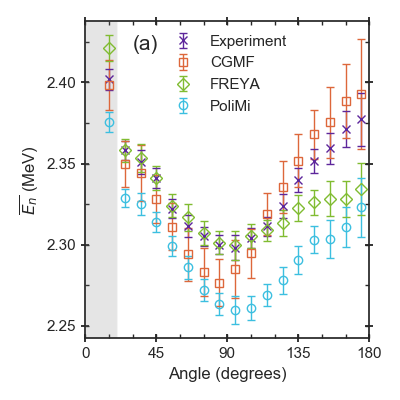

In [13]:
fig = plt.figure(figsize=(4,4))
ax = plt.gca()

for i in to_plot:
    Esum_df = Esum_dfs[i]
    ax.errorbar(Esum_df['th_bin_center'],
                 Esum_df['Eave'],
                 yerr=Esum_df['Eave_err'],
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c=colors[i])
leg = plt.legend([legends[i] for i in to_plot])
leg.get_frame().set_edgecolor('w')

ax.axvspan(0,20,facecolor='gray', alpha=0.2)
ax.set_xlabel('Angle (degrees)')
ax.set_ylabel('$\overline{E_n}$ (MeV)')
ax.set_xlim([0,180])
# ax.set_ylim([2.5,3.3])

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(45))
ax.yaxis.set_major_locator(MultipleLocator(.05))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(15))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))

ax.text(30,2.42,'(a)', size=15, backgroundcolor='white')

plt.tight_layout()
bicorr_plot.save_fig_to_folder('Esum_vs_angle_compare',r'compare/fig')

# Divide by experimental

<IPython.core.display.Javascript object>


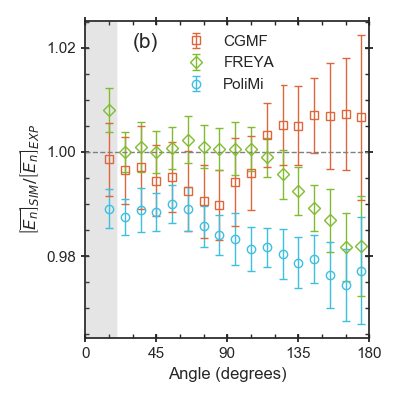

In [14]:
Esum_exp = Esum_dfs[0]
to_plot = [1,2,3]

fig = plt.figure(figsize=(4,4))
ax = plt.gca()


for i in to_plot:
    Esum_df = Esum_dfs[i]
    
    x = Esum_df['th_bin_center']
    # y = Esum_df['Eave']/Esum_exp['Eave']
    y, yerr = bicorr_math.prop_err_division(Esum_df['Eave'],Esum_df['Eave_err'],
                                            Esum_exp['Eave'],Esum_exp['Eave_err']) 
    
    ax.errorbar(x,
                 y,
                 yerr=yerr,
                 fmt=fmts[i],
                 markeredgewidth=1,
                 markerfacecolor='none',
                 elinewidth=line_thickness,
                 capthick = line_thickness,
                 capsize = ebar_width,
                 c=colors[i])
leg = plt.legend([legends[i] for i in to_plot],loc=9)
leg.get_frame().set_edgecolor('w')
plt.axhline(1.0,color='gray', linewidth=1,linestyle='--')

ax.axvspan(0,20,facecolor='gray', alpha=0.2)
ax.set_xlabel('Angle (degrees)')

ax.set_ylabel(r'$\left[\overline{E_n}\right]_{SIM} / \left[\overline{E_n}\right]_{EXP}$')
#plt.ylabel(r'$\Big[ \overline{E_n} \Big]_{\texttt{EXP}}$')
ax.set_xlim([0,180])
# ax.set_ylim([2.5,3.3])

# Set up ticks
ax.tick_params(axis='both',
               which='major',
               direction='inout',
               length=6,
               color='k',
               bottom=True, right=True, top=True, left=True)
ax.tick_params(axis='both',
               which='minor',
               direction='in',
               length=3,
               bottom=True, right=True, top=True, left=True)
# Major
ax.xaxis.set_major_locator(MultipleLocator(45))
ax.yaxis.set_major_locator(MultipleLocator(.02))
# Minor
ax.xaxis.set_minor_locator(MultipleLocator(15))
ax.yaxis.set_minor_locator(MultipleLocator(0.005))

ax.text(30,1.02,'(b)', size=15, backgroundcolor='white')

plt.tight_layout()
bicorr_plot.save_fig_to_folder('Esum_vs_angle_diff',r'compare/fig')
plt.show()